# Задания для самостоятельного решения


In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [2]:
### Ваши код/вычисления...
delta = 3
beta = 0.95
sd = (225)**0.5
a = 1 - beta
z = stats.norm.ppf((1-a/2), loc=0, scale=1)  
n = int(((z*sd)/delta)**2)#Запишите в эту переменную ваш высчитанный ответ!
n

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [3]:
### Ваши код/вычисления...
n = 25
x_mean = 130
sd = 15
beta = 0.98
a = 1 - beta
z = stats.norm.ppf((1-a/2), loc=0, scale=1)
L = int((x_mean + (z*sd)/(n**0.5)) - (x_mean - (z*sd)/(n**0.5)))  #Запишите в эту переменную ваш высчитанный ответ!
L

13

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [4]:
# import scipy.stats as stats

population_men  = stats.norm.rvs(loc=171, scale=19, size=11000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
alpha = 0.001
result = stats.ttest_ind(population_men, population_women, equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, различие значительно')
else:
    print('Не отвергаем нулевую гипотезу, различие не значительно')

Ttest_indResult(statistic=25.62357932365786, pvalue=1.1240414321378062e-142)
Отвергаем нулевую гипотезу, различие значительно


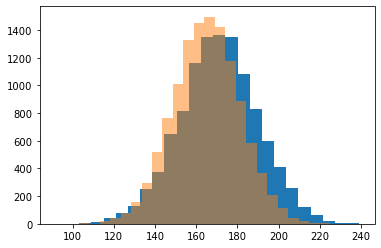

In [5]:
plt.hist(population_men, bins=25)
plt.hist(population_women, bins=25, alpha=0.5); 

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [6]:
### Ваш код...
delta = 50
beta = 0.95
sd = 150
a = 1 - beta
z = stats.norm.ppf((1-a/2), loc=0, scale=1)  
n = int(((z*sd)/delta)**2)
n

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [7]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [8]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта
x = [[10,15],[39,34]]
oddsratio, pvalue = stats.fisher_exact(x)#Возможно пригодится эта функция.
oddsratio, pvalue
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, различие значительно, маг шарлатан)')
else:
    print('Не отвергаем нулевую гипотезу, различие не значительно,  маг действительно умеет предсказывать погоду')

Не отвергаем нулевую гипотезу, различие не значительно,  маг действительно умеет предсказывать погоду


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [9]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [10]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...
mean_confidence_interval(data,0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [11]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:

In [12]:
result = stats.ttest_ind(data_1, data_2, equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, выборки data_1 и data_2 не принадлежат одной генеральной совокупности')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)
Отвергаем нулевую гипотезу, выборки data_1 и data_2 не принадлежат одной генеральной совокупности


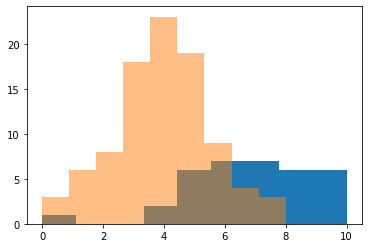

In [13]:
plt.hist(data_1, bins=9)
plt.hist(data_2, bins=9, alpha=0.5); 

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

#### Ваши выводы: Если  p-value будет больше установленного нами уровеня значимости *альфа* , то распределение будет считаться нормальным, если меньше, то распределение ненормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [14]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

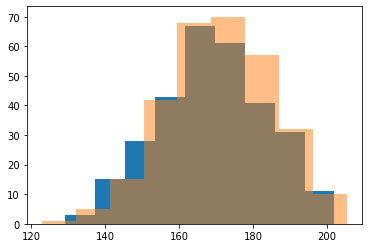

In [15]:
# выборки незначительно отличаются
plt.hist(A, bins=9)
plt.hist(B, bins=9, alpha=0.5); 

In [16]:
#Если пациенты разные, то выборки независимы, используем stats.ttest_ind
alpha = 0.05
result = stats.ttest_ind(A, B, equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, имеется значимое различие эффективности препаратов А и B')
else:
    print('Не отвергаем нулевую гипотезу, различия являются чисто случайными')

# минимальный p-value при котором различия были бы уже значимы должен быть меньше заданного уровня значимости, в данном
# случае 0,049(9)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)
Не отвергаем нулевую гипотезу, различия являются чисто случайными


In [17]:
#Если пациенты одни и те же, то выборки зависимы, используем stats.ttest_rel
alpha = 0.05
result = stats.ttest_rel(A, B)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, имеется значимое различие эффективности препаратов А и B')
else:
    print('Не отвергаем нулевую гипотезу, различия являются чисто случайными')

Ttest_relResult(statistic=-2.0349336314319992, pvalue=0.042739435733033855)
Отвергаем нулевую гипотезу, имеется значимое различие эффективности препаратов А и B
